## Conclusiones
* Fue implementado un proceso de Machine Learning mediante eliminación recursiva de características con validación cruzada (RFECV) a 5 modelos de clasificación para predecir si una persona fallece tras un intento de suicidio.
* Los mejores modelos fueron Xtreme Gradient Boosting, Linear Support Vector Machine y Logistic Regression.
* Dichos modelos fueron sometidos a validación de hiperparámetros y todos consiguieron puntajes f1 muy similares.
* El mejor puntaje fue 0.78 lo cual indica que el 78% de los datos fueron clasificados correctamente. 
* Estos modelos pueden ser usados para determinar si una persona con problemas familiares, problemas de pareja o recibe acompañamiento psicológico es propensa a cometer un intento de suicidio.

## Información adicional
* El dataset inicial tiene 18507 filas y 19 columnas.
* Las mujeres llevan a cabo casi el doble de intentos de suicidio.
* Robledo es la comuna donde más intentos de suicidio hubo.
* Septiembre y marzo son los meses donde más intentos de suicidio se llevan a cabo.
* Los estratos 2 y 3 presentan la mayor cantidad de intentos de suicidio.
* Las personas que ya han intentado suicidarse son propensas a intentarlo de nuevo.


## Librerías

In [45]:
import pandas as pd; import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt


In [46]:
df_i = pd.read_csv('intento_suicidio.csv')

In [47]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#-------------------------Estilos para los gráficos. Más info en: https://matplotlib.org/stable/users/explain/customizing.html
plt.style.use("fivethirtyeight") ##Estilo general

##Modificar fuente (texto)
mpl.rcParams["font.size"]=10.5  ##Tamaño de fuente
mpl.rcParams["font.family"]="serif"     ##Opciones: 'serif' | 'sans-serif' | 'cursive' | 'Times New Roman' | 'monospace'
mpl.rcParams["font.weight"]="normal"  ##Opciones: 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
##Leyenda
mpl.rcParams["legend.fancybox"]=True    ##Caja de la leyenda con esquinas redondeadas
mpl.rcParams["legend.fontsize"]=12  ##Tamaño de fuente de la leyenda
mpl.rcParams["legend.title_fontsize"]=14  ##Tamaño de fuente del titulo de la legenda
##Ticks
mpl.rcParams["xtick.labelsize"]=16
mpl.rcParams["ytick.labelsize"]=14
#Grid
mpl.rcParams["grid.linestyle"]='--'
mpl.rcParams["grid.alpha"]=0.4
mpl.rcParams["grid.color"]='gray'
mpl.rcParams["grid.linewidth"]=1.2
##Ejes
mpl.rcParams["axes.facecolor"]="white"
mpl.rcParams["axes.edgecolor"]="0.2"
mpl.rcParams["axes.linewidth"]=1
mpl.rcParams["axes.titleweight"]="normal"
mpl.rcParams["axes.labelsize"]=16
mpl.rcParams["axes.titlesize"]=25
mpl.rcParams["axes.spines.top"]=False
mpl.rcParams["axes.spines.right"]=False
mpl.rcParams["axes.labelweight"]="normal"
##Figura
mpl.rcParams["figure.titleweight"]="normal"
mpl.rcParams["figure.facecolor"]="white"
mpl.rcParams["figure.figsize"]=(12,4)
mpl.rcParams["figure.titlesize"]=16
mpl.rcParams["figure.labelsize"]=16
mpl.rcParams["figure.labelweight"]="bold"

### Preguntas a responder

* ¿Cuál es la distribución de la edad?
* ¿Cuántos casos hay por comuna/corregimiento? separado por sexo
* ¿Cuántos casos hay por estrato? separado por trastornos
* ¿Cuántos casos hay por año y por mes?
* Gráfico de pastel con problemas economicos/laborales, problemas familiares/pareja, intentos previos de suicidio, abuso de alcohol o psa

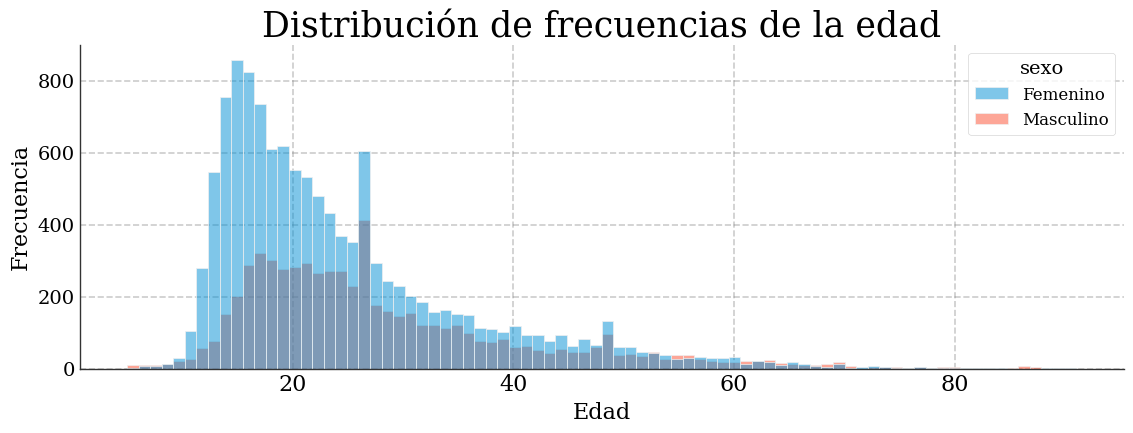

In [48]:
##Distribución de la edad

fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(data=df_i,x=df_i['edad'],hue='sexo')

ax.set_title('Distribución de frecuencias de la edad')
ax.set_ylabel('Frecuencia')
ax.set_xlabel('Edad')
plt.show()

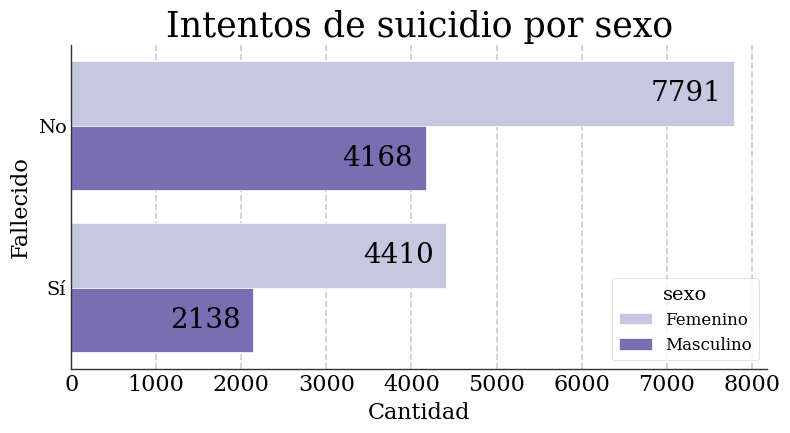

In [49]:
##Intentos logrados por sexo

fallecidos_sexo = df_i.groupby(['fallecido','sexo'])['mes'].count().reset_index()

fig, ax = plt.subplots(figsize=(8,4))

bar = sns.barplot(data=fallecidos_sexo,x='mes',y='fallecido',ax=ax,hue='sexo',palette='Purples',edgecolor='w',saturation=1)
for container in bar.containers:
    ax.bar_label(container,padding=-60,fontsize=20)
ax.set_xlabel('Cantidad')
ax.set_ylabel('Fallecido')
ax.set_title('Intentos de suicidio por sexo')
ax.spines[['top','right']].set_visible(False)

Text(0.5, 1.0, 'Intentos de suicidio por comuna')

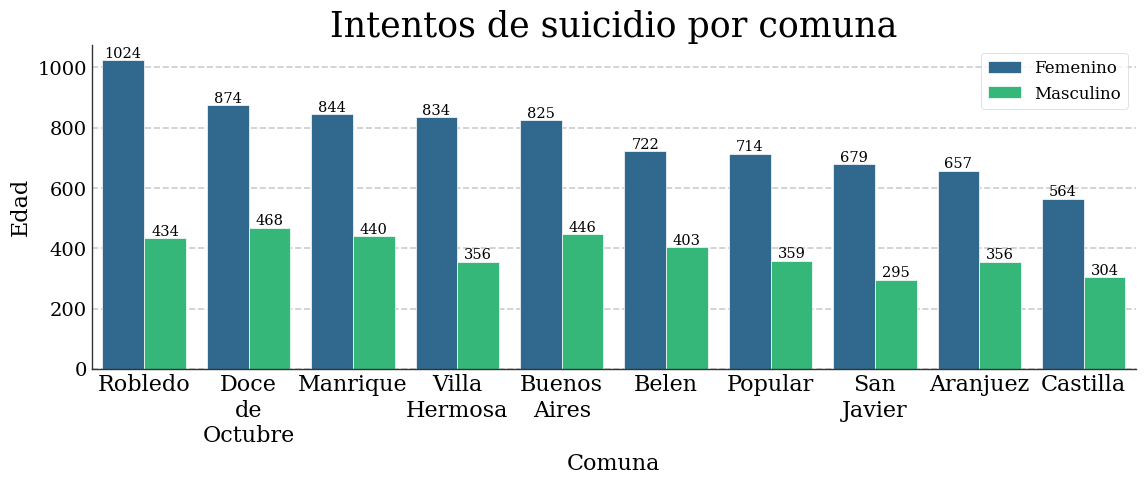

In [50]:
#Casos por comuna
comuna = df_i.dropna(subset=['comuna'])

fig, ax = plt.subplots(figsize=(12,4))

top_comuna_sexo = comuna.groupby(['comuna','sexo'])['edad'].count().reset_index().sort_values(by='edad',ascending=False)['comuna'].head(10)

comuna_sexo = comuna.loc[comuna['comuna'].isin(top_comuna_sexo)].groupby(['comuna','sexo'])['edad'].count().reset_index().sort_values(by='edad',ascending=False)
xlabels = [i.replace(' ','\n') for i in comuna_sexo['comuna'].unique()]
bar = sns.barplot(data=comuna_sexo,x='comuna',y='edad',ax=ax,orient='x',hue='sexo',palette='viridis',saturation=1,edgecolor='w')

ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels)
for container in bar.containers:
    ax.bar_label(container)

ax.set_xlabel('Comuna')
ax.set_ylabel('Edad')
ax.legend(title='')
ax.set_title('Intentos de suicidio por comuna')

In [51]:
# ##Datos para dashboard en Power BI
# comuna.loc[comuna['edad']>=6].to_csv('suicidios.csv',index=None)
# estrato = comuna.dropna(subset=['estrato'])

# estrato.to_csv('estrato.csv',index=None)

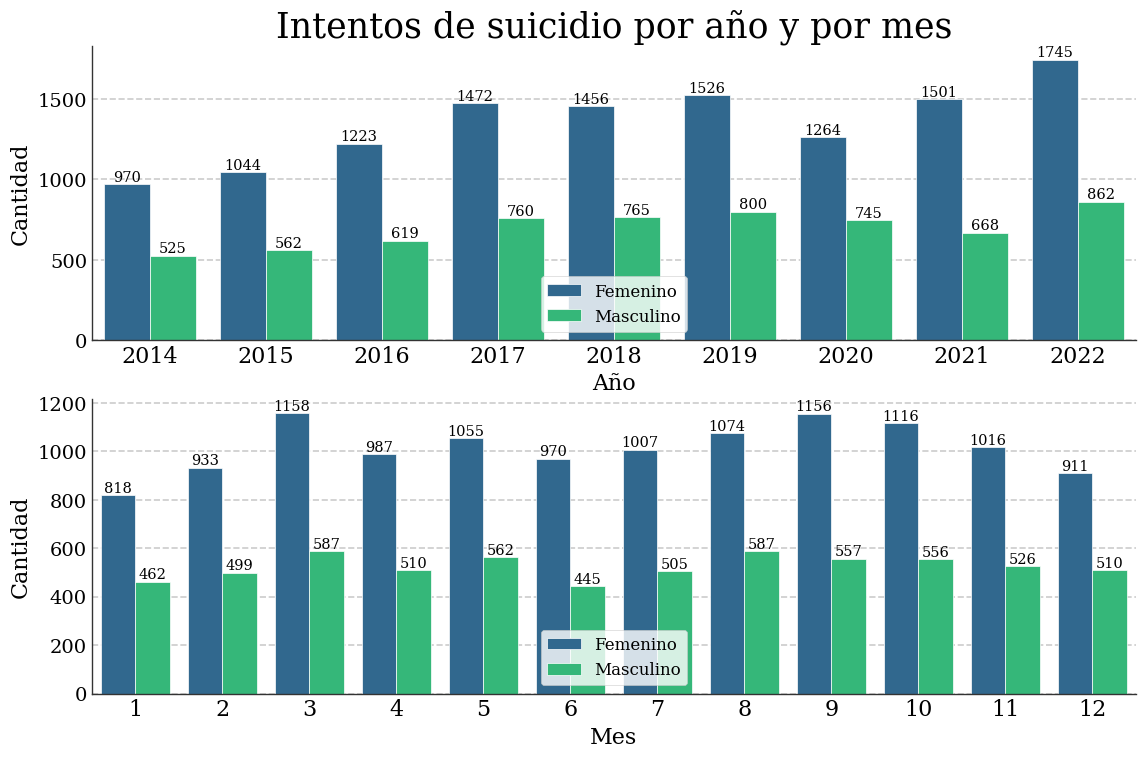

In [52]:
##Casos por año y por mes

fig, ax = plt.subplots(figsize=(12,8),nrows=2)
año_sexo = df_i.groupby(['año','sexo'])['mes'].count().reset_index()
mes_sexo = df_i.groupby(['mes','sexo'])['año'].count().reset_index()

bar1 = sns.barplot(data=año_sexo,x='año',y='mes',hue='sexo',palette='viridis',saturation=1,ax=ax[0],edgecolor='w')
bar2 = sns.barplot(data=mes_sexo,x='mes',y='año',hue='sexo',palette='viridis',saturation=1,ax=ax[1],edgecolor='w')
for container in bar1.containers:
    ax[0].bar_label(container)
for container in bar2.containers:
    ax[1].bar_label(container)
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Cantidad')
ax[1].set_ylabel('Cantidad')
ax[1].set_xlabel('Mes')
ax[0].set_title('Intentos de suicidio por año y por mes')
ax[0].legend(loc='lower center')
ax[1].legend(loc='lower center')
plt.show()

## Análisis específicos con los datos de estrato socioeconómico

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6')]

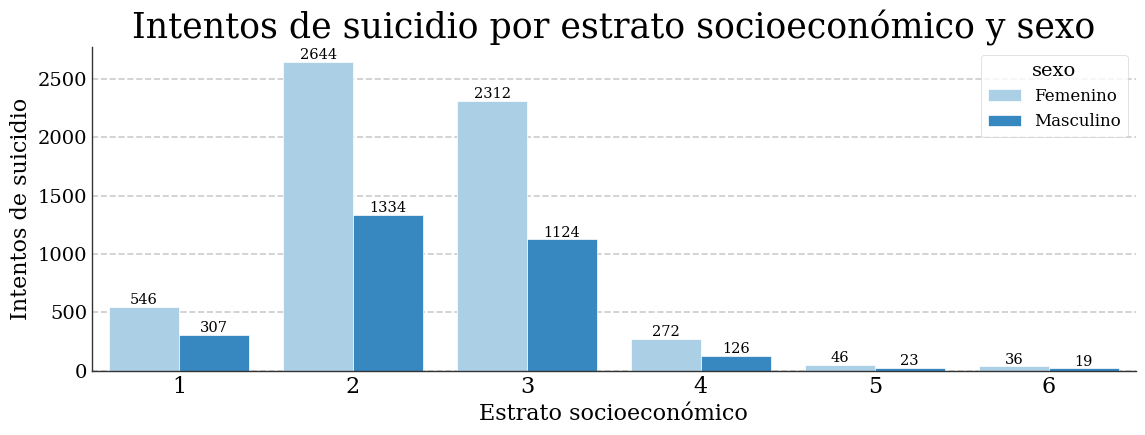

In [62]:
df_estrato = df_i.dropna(subset='estrato')


##Intentos de suicidio por estrato y sexo

estrato_sexo = df_estrato.groupby(['estrato','sexo'])['mes'].count().reset_index()


fig, ax = plt.subplots()

bar1 = sns.barplot(data=estrato_sexo,x='estrato',y='mes',hue='sexo',palette='Blues',saturation=1,edgecolor='w')

for container in bar1.containers:
    ax.bar_label(container)

ax.set_title('Intentos de suicidio por estrato socioeconómico y sexo')
ax.set_xlabel('Estrato socioeconómico')
ax.set_ylabel('Intentos de suicidio')

ax.set_xticks(range(6))
ax.set_xticklabels(range(1,7))

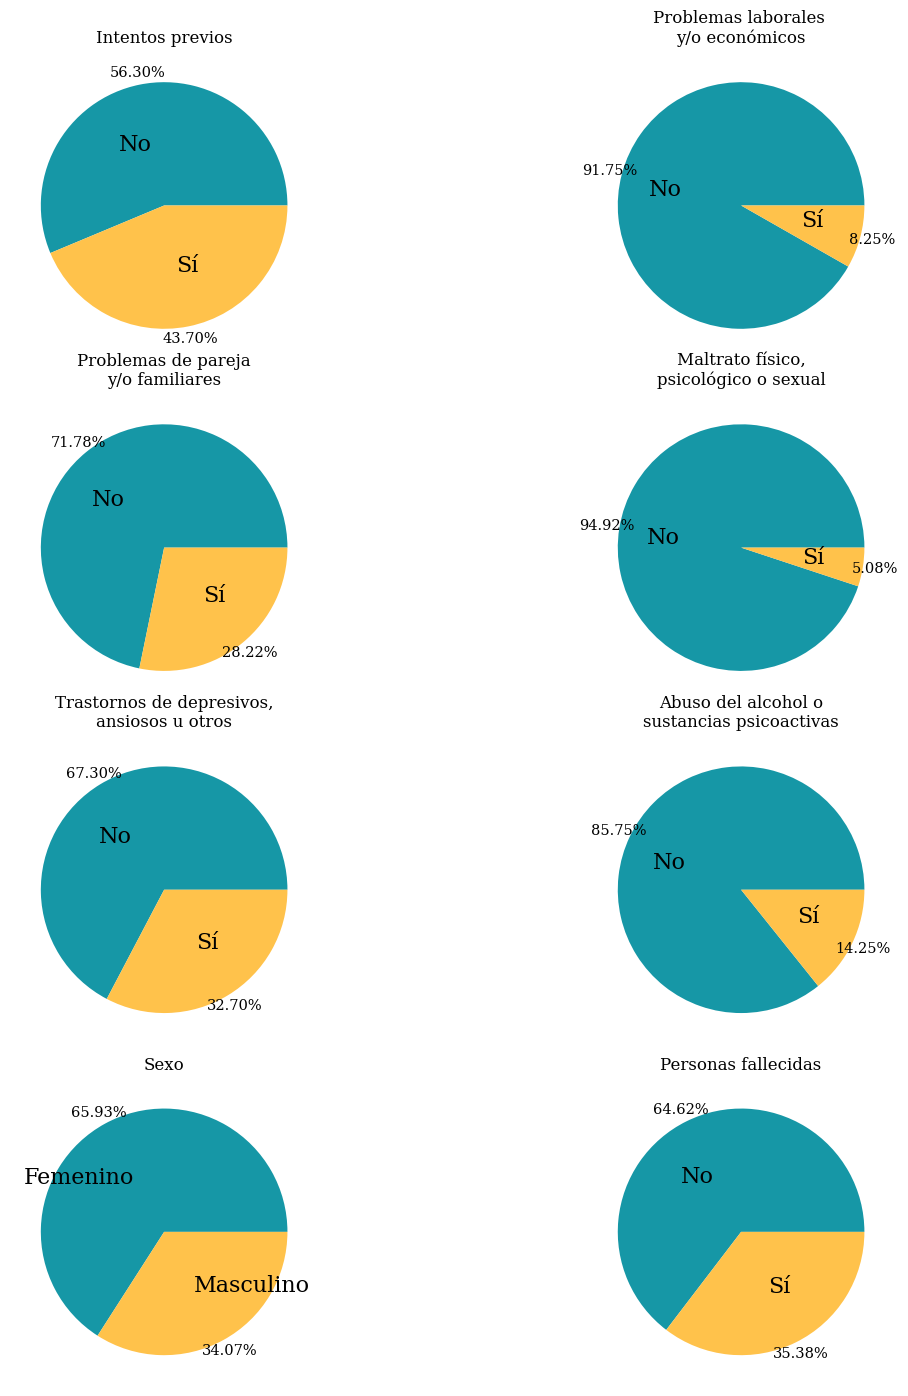

In [64]:
##Analisis complemetarios - Distribución de los datos generales

pastel = df_i[['intentos previos','problemas_laborales_economicos','problemas_familia_pareja','maltrato fps','trastornos','alcohol o spa',
               'sexo','fallecido']]

titulos = ['Intentos previos','Problemas laborales \ny/o económicos'
           ,'Problemas de pareja\ny/o familiares','Maltrato físico,\npsicológico o sexual','Trastornos de depresivos,\nansiosos u otros'
           ,'Abuso del alcohol o\nsustancias psicoactivas','Sexo','Personas fallecidas']
fig, ax = plt.subplots(figsize=(12,14),ncols=2,nrows=4)
fig.tight_layout(h_pad=0,w_pad=-1)
ax = ax.flat
colors = ['#1697a6','#ffc24b','#0e606b','#fed9b7','#f47068','#6a8532','#00b4d8']

for i, col in enumerate(pastel):
    pastel[col].value_counts().plot(kind='pie',ax=ax[i],colors=colors,labeldistance=0.5,autopct='%.2f%%',pctdistance=1.1,radius=1)
    ax[i].set_ylabel('')
    ax[i].set_title(f'{titulos[i]}',fontsize=12)

## Proceso de Machine Learning

**NOTA**: Solo vamos a trabajar con los datos NO nulos. Además, las columnas desbalanceadas no serán tomadas en cuenta. Las columnas que no serán tomadas en cuenta son:
* Estrato
* Gestante
* Problemas laborales/económicos
* Maltrato físico, psicológico y/o sexual
* Lugar del intento
* Remisión con psiquiatría
* Comuna

In [71]:
##Primero vamos a identificar la distribución de los datos por columna
df_ml= df_i.dropna().drop(columns=['fecha'])
##Vamos ver cuántos valores hay de cada tipo por columna

for i,col in enumerate(df_ml):
    print("\n",df_ml[col].value_counts(normalize=True))


 año
2022    0.241786
2021    0.230833
2019    0.204945
2020    0.198307
2018    0.124129
Name: proportion, dtype: float64

 mes
9     0.098573
10    0.097577
8     0.095918
5     0.092267
11    0.089612
3     0.082310
7     0.081646
6     0.078327
12    0.077000
4     0.074345
2     0.071357
1     0.061069
Name: proportion, dtype: float64

 edad
16    0.064885
15    0.058579
17    0.054763
18    0.051278
19    0.049784
        ...   
77    0.000166
89    0.000166
81    0.000166
78    0.000166
90    0.000166
Name: proportion, Length: 80, dtype: float64

 sexo
Femenino     0.707434
Masculino    0.292566
Name: proportion, dtype: float64

 estrato
2.0    0.444408
3.0    0.411716
1.0    0.078659
4.0    0.049120
5.0    0.009293
6.0    0.006804
Name: proportion, dtype: float64

 gestante
No    0.995188
Sí    0.004812
Name: proportion, dtype: float64

 hospitalizado
Sí    0.645702
No    0.354298
Name: proportion, dtype: float64

 fallecido
No    0.645702
Sí    0.354298
Name: proportion, dtyp

<Axes: >

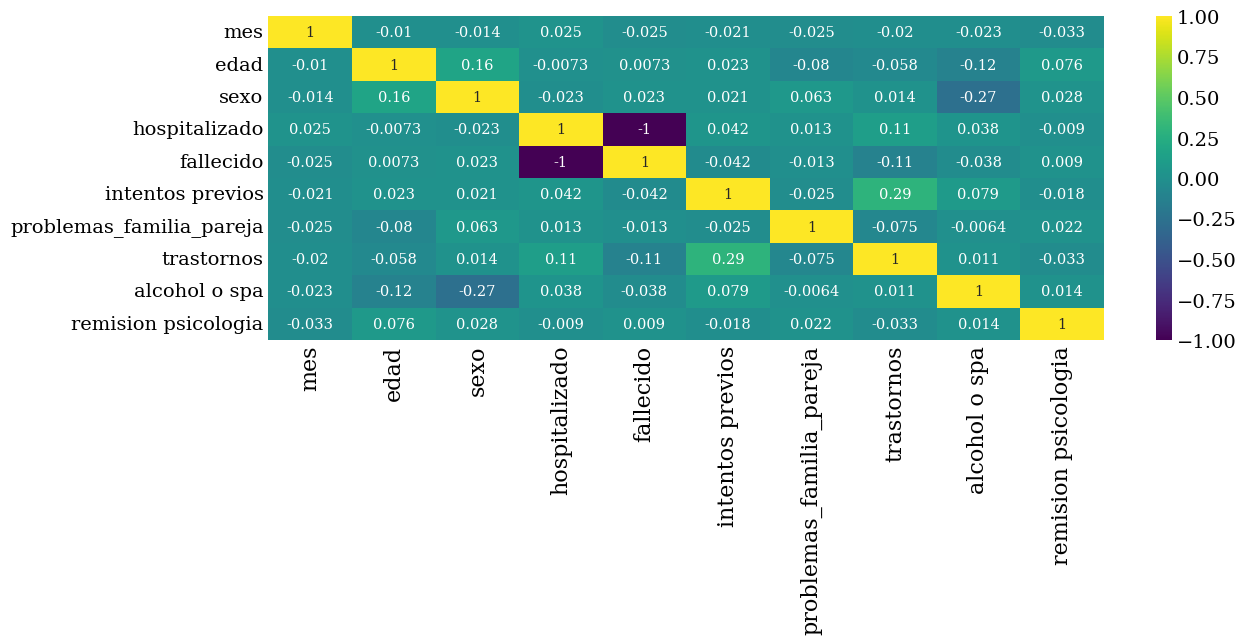

In [155]:
##Descartar columnas desmabalanceadas y datos nulos.

df_ml = df_i[['mes', 'edad', 'sexo',
       'hospitalizado', 'fallecido', 'intentos previos'
       , 'problemas_familia_pareja', 'trastornos', 'alcohol o spa', 'remision psicologia']].dropna().reset_index(drop=True)

##Codificar las variables categóricas
# df_ml['']

cat = df_ml.select_dtypes('O')

for i,col in enumerate(cat):
    cat[col] = cat[col].map({'Sí':0,'No':1,'Masculino':1,'Femenino':0})

df_ml[cat.columns] = cat

##Correlacion entre las variables

sns.heatmap(df_ml.corr(method='spearman'),annot=True,cmap='viridis')

In [225]:
##Usar Eliminacion recursiva de caracteristicas con validacion cruzada RFECV en varios modelos para determinar cuál es el mejor modelo y las mejores
#caracteristicas


##Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as XGBClassifier
from sklearn.svm import LinearSVC

##Eliminacion de features y otros
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

x, y = df_ml.drop(columns=['hospitalizado','fallecido']), df_ml['fallecido']

x_train,x_test, y_train,y_test =train_test_split(x,y,random_state=123)

modelos = {'Regresión Logística':LogisticRegression(n_jobs=-1,random_state=123),
           'Árbol de decisiones':DecisionTreeClassifier(random_state=123),
           'Bosque aleatorio':RandomForestClassifier(n_jobs=-1,random_state=123),
           'Xtreme Gradient Boosting':XGBClassifier(n_jobs=-1,random_state=123),
           'Máquina de vectores de soporte':LinearSVC(random_state=123)}

##Diccionario para guardar los resultados

resultados = {}

for nombre_modelo, modelo in modelos.items():
    rfecv = RFECV(estimator=modelo,cv=5,step=1,n_jobs=-1,scoring='accuracy',min_features_to_select=3)

    y_pred = rfecv.fit(x_train,y_train).predict(x_test)

    resultados[nombre_modelo] = {
        'Cantidad optima de variables':rfecv.n_features_,
        'Variables seleccionadas':x.columns[rfecv.support_].tolist(),
        'Puntaje f1':f1_score(y_test,y_pred)
    }

##Mostrar resultados

for modelo,resultado in resultados.items():
    print(f'Modelo {modelo}')
    print(f'Cantidad optima de variables: {resultado["Cantidad optima de variables"]}')
    print(f'Variables seleccionadas: {resultado["Variables seleccionadas"]}')
    print(f'Resultado del test de exactitud en el modelo: {resultado["Puntaje f1"]:.4f}\n')

Modelo Regresión Logística
Cantidad optima de variables: 3
Variables seleccionadas: ['problemas_familia_pareja', 'trastornos', 'alcohol o spa']
Resultado del test de exactitud en el modelo: 0.7772

Modelo Árbol de decisiones
Cantidad optima de variables: 3
Variables seleccionadas: ['mes', 'edad', 'problemas_familia_pareja']
Resultado del test de exactitud en el modelo: 0.6990

Modelo Bosque aleatorio
Cantidad optima de variables: 3
Variables seleccionadas: ['mes', 'edad', 'trastornos']
Resultado del test de exactitud en el modelo: 0.7209

Modelo Xtreme Gradient Boosting
Cantidad optima de variables: 3
Variables seleccionadas: ['mes', 'trastornos', 'remision psicologia']
Resultado del test de exactitud en el modelo: 0.7772

Modelo Máquina de vectores de soporte
Cantidad optima de variables: 3
Variables seleccionadas: ['problemas_familia_pareja', 'trastornos', 'alcohol o spa']
Resultado del test de exactitud en el modelo: 0.7772



## Validación de hiperparámetros

* --> Hay 3 modelos que tienen un puntaje f1 similar. Hagamos validación de hiperparámetros a los para determinar cuál es mejor basado en sus características de entrada

In [ ]:
from sklearn.model_selection import GridSearchCV

##Almacenar todos los x de entrada para cada modelo

x_log = df_ml.loc[:,resultados['Regresión Logística']['Variables seleccionadas']]
x_xgb = df_ml.loc[:,resultados['Xtreme Gradient Boosting']['Variables seleccionadas']]
x_svm = df_ml.loc[:,resultados['Máquina de vectores de soporte']['Variables seleccionadas']]


##Crear las grillas

grid_log = {'C':[0.01,0.1,1,10],'solver': ['liblinear', 'lbfgs', 'saga'],'penalty': ['l1', 'l2', 'elasticnet'],'max_iter': [100, 500, 1000]}
grid_xgb = {'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [50, 100, 200,250],'max_depth': [3, 5, 7],'gamma': [0, 0.1, 0.5]}
grid_svm = {'C': [0.01, 0.1, 1,10],'loss': ['hinge', 'squared_hinge'],'max_iter': [500, 1000, 2000],'class_weight': [None, 'balanced']}



def mejores_parametros(modelo, grilla,x):
    grid = GridSearchCV(estimator=modelo, param_grid=grilla,n_jobs=-1,verbose=2,cv=5,scoring='f1')
    x_train, x_test, y_train, y_test = train_test_split(x,y)
    y_pred = grid.fit(x_train,y_train).predict(x_test)
    
    print('Mejor puntaje: ',np.round(grid.best_score_,3))
    print('Mejores hiperperámetros: ', grid.best_params_)
    print('F1:',round(f1_score(y_test,y_pred),5))

    return grid.best_estimator_


In [260]:
##Regresión logistica

best_log = mejores_parametros(LogisticRegression(random_state=123,n_jobs=-1),grid_log,x_log)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejor puntaje:  0.781
Mejores hiperperámetros:  {'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
F1: 0.77718


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
240 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\

In [261]:
## Xgb

best_xgb = mejores_parametros(XGBClassifier(n_jobs=-1),grid_xgb,x_xgb)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejor puntaje:  0.781
Mejores hiperperámetros:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
F1: 0.77718


In [262]:
## SVC

best_svc = mejores_parametros(LinearSVC(),grid_svm,x_svm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejor puntaje:  0.781
Mejores hiperperámetros:  {'C': 0.01, 'class_weight': None, 'loss': 'hinge', 'max_iter': 500}
F1: 0.77718
